**Import** **Libraries**

In [ ]:
from pandas.io.formats.style import plt
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Loading** **the** **Dataset**

```
# This is formatted as code
```



In [ ]:
iris_data=pd.read_csv("irisflowers.csv")

In [ ]:
#first 5 rows of the data
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#last five rows of the data
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#to display information of data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#to display statistics of data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#to display no.of samples on each class
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Preprocessing** **the** **Data**

In [ ]:
#check for null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Exploratory** **Data** **Analysis**

<Axes: >

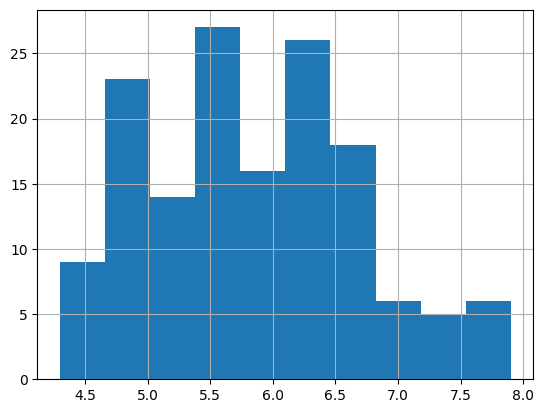

In [ ]:
iris_data['sepal_length'].hist()

<Axes: >

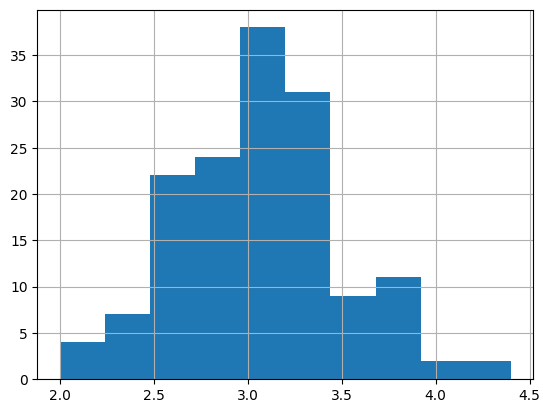

In [ ]:
iris_data['sepal_width'].hist()

<Axes: >

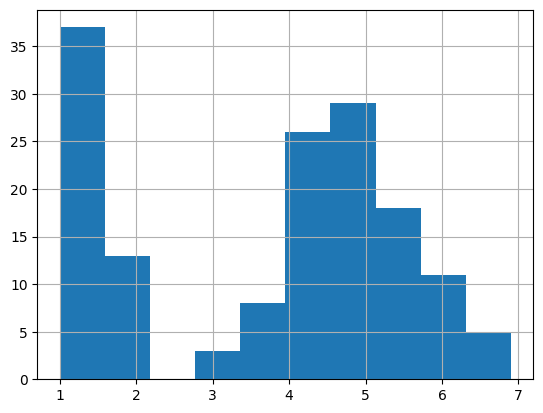

In [ ]:
iris_data['petal_length'].hist()

<Axes: >

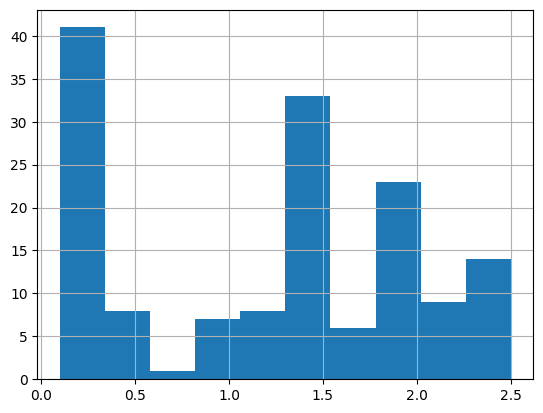

In [ ]:
iris_data['petal_width'].hist()

In [ ]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

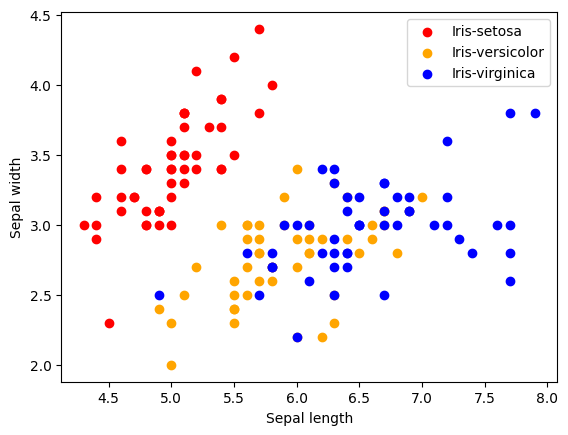

In [ ]:
for i in range(3):
  x=iris_data[iris_data['species']==species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
  plt.xlabel("Sepal length")
  plt.ylabel("Sepal width")
  plt.legend()

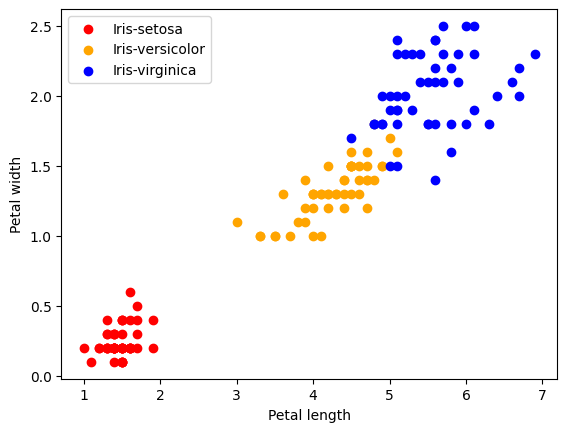

In [ ]:
for i in range(3):
  x=iris_data[iris_data['species']==species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("Petal length")
  plt.ylabel("Petal width")
  plt.legend()

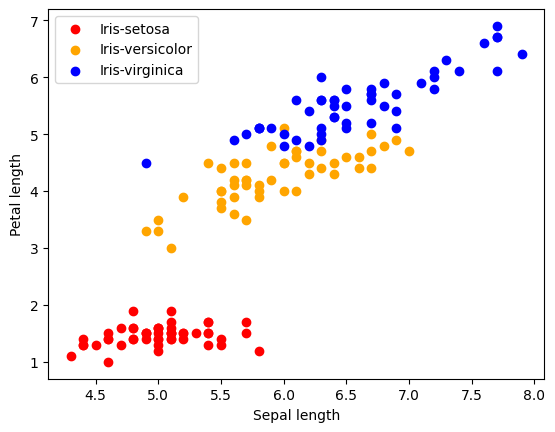

In [ ]:
for i in range(3):
  x=iris_data[iris_data['species']==species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
  plt.xlabel("Sepal length")
  plt.ylabel("Petal length")
  plt.legend()

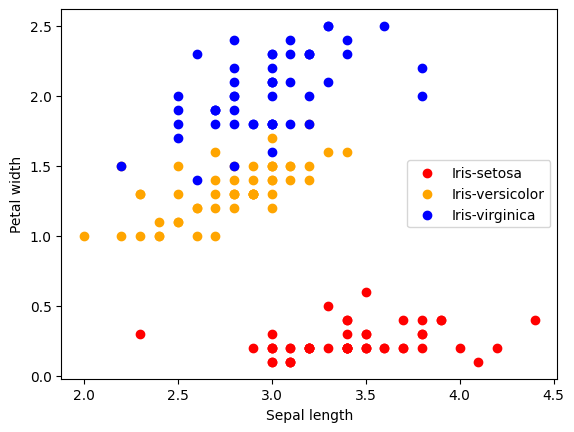

In [ ]:
for i in range(3):
  x=iris_data[iris_data['species']==species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("Sepal length")
  plt.ylabel("Petal width")
  plt.legend()

**Model** **Training**

In [ ]:
#splitting the data into features & targets
X=iris_data.drop(columns='species',axis=1)
Y=iris_data['species']

In [ ]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=5000)

In [ ]:
#Training the Logistic Regression Model with training data
model.fit(X_train,Y_train)

LogisticRegression(max_iter=5000)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Model Evaluation
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy on Training Data:",training_data_accuracy)

Accuracy on Training Data: 0.9714285714285714


In [ ]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)


In [ ]:
print("Accuracy score on Test Data:",test_data_accuracy)

Accuracy score on Test Data: 0.9555555555555556
